<a href="https://colab.research.google.com/github/nileshnerkar/LinkedIn_Learning/blob/master/Apache_PySpark_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to PySpark

## Install Spark

In [1]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [87.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Packages [31.7

### Setting up Spark Environment

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

## Downloading and preprocessing Chicago's Reported Crime Data

In [3]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD 
!ls -l

--2020-04-01 05:10:08--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.205, 52.206.68.26, 52.206.140.199
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [              <=>   ]   1.56G  3.28MB/s    in 8m 16s  

2020-04-01 05:18:25 (3.22 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1673415703]

total 1634204
-rw-r--r-- 1 root root 1673415703 Mar 31 11:05 'rows.csv?accessType=DOWNLOAD'
drwxr-xr-x 1 root root       4096 Mar 18 16:23  sample_data


In [5]:
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv
!ls -l

total 1854800
-rw-r--r--  1 root root 1673415703 Mar 31 11:05 reported-crimes.csv
drwxr-xr-x  1 root root       4096 Mar 18 16:23 sample_data
drwxrwxr-x 13 1000 1000       4096 Jun  1  2018 spark-2.3.1-bin-hadoop2.7
-rw-r--r--  1 root root  225883783 Jun  1  2018 spark-2.3.1-bin-hadoop2.7.tgz


In [7]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2019-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11| 

## Schemas

In [8]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [0]:
from pyspark.sql.types import IntegerType, StringType, StructField, StructType, TimestampType, BooleanType, DoubleType

In [9]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [0]:
labels = [('ID', StringType()),
 ('Case Number',StringType()),
 ('Date',TimestampType()),
 ('Block',StringType()),
 ('IUCR',StringType()),
 ('Primary Type',StringType()),
 ('Description',StringType()),
 ('Location Description',StringType()),
 ('Arrest',StringType()),
 ('Domestic',BooleanType()),
 ('Beat',StringType()),
 ('District',StringType()),
 ('Ward',StringType()),
 ('Community Area',StringType()),
 ('FBI Code',StringType()),
 ('X Coordinate',StringType()),
 ('Y Coordinate',StringType()),
 ('Year',IntegerType()),
 ('Updated On',StringType()),
 ('Latitude',DoubleType()),
 ('Longitude',DoubleType()),
 ('Location',StringType())]

In [17]:
schema = StructType([StructField (x[0], x[1], True) for x in labels ])
schema

StructType(List(StructField(ID,StringType,true),StructField(Case Number,StringType,true),StructField(Date,TimestampType,true),StructField(Block,StringType,true),StructField(IUCR,StringType,true),StructField(Primary Type,StringType,true),StructField(Description,StringType,true),StructField(Location Description,StringType,true),StructField(Arrest,StringType,true),StructField(Domestic,BooleanType,true),StructField(Beat,StringType,true),StructField(District,StringType,true),StructField(Ward,StringType,true),StructField(Community Area,StringType,true),StructField(FBI Code,StringType,true),StructField(X Coordinate,StringType,true),StructField(Y Coordinate,StringType,true),StructField(Year,IntegerType,true),StructField(Updated On,StringType,true),StructField(Latitude,DoubleType,true),StructField(Longitude,DoubleType,true),StructField(Location,StringType,true)))

In [0]:
rc = spark.read.csv('reported-crimes.csv', schema= schema)

In [20]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [23]:
rc.show(5) #since some of the entries in the data dont conform to our data type

+----+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
|  ID|Case Number|Date|Block|IUCR|Primary Type|Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|Latitude|Longitude|Location|
+----+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
|null|       null|null| null|null|        null|       null|                null|  null|    null|null|    null|null|          null|    null|        null|        null|null|      null|    null|     null|    null|
|null|       null|null| null|null|        null|       null|                null|  null|    null|null|    null|null|          null|    null|        null|        

## Working with Columns

**Display only the first 5 rows of the column name IUCR **

In [13]:
rc.select('IUCR').show(5)

+----+
|IUCR|
+----+
|1153|
|0281|
|0620|
|0810|
|0281|
+----+
only showing top 5 rows



In [14]:
rc.select(col('IUCR')).show(5)

+----+
|IUCR|
+----+
|1153|
|0281|
|0620|
|0810|
|0281|
+----+
only showing top 5 rows



  **Display only the first 4 rows of the column names Case Number, Date and Arrest**

In [15]:
rc.select('Case Number','Date','Arrest').show(4)

+-----------+-------------------+------+
|Case Number|               Date|Arrest|
+-----------+-------------------+------+
|   JA366925|2001-01-01 11:00:00| false|
|   JB147188|2017-10-08 03:00:00| false|
|   JB147595|2017-03-28 14:00:00| false|
|   JB147230|2017-09-09 20:17:00| false|
+-----------+-------------------+------+
only showing top 4 rows



** Add a column with name One, with entries all 1s **

In [0]:
from pyspark.sql.functions import lit

In [17]:
rc.withColumn('NewColumn',lit(1)).show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+---------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|NewColumn|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+---------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|

** Remove the column IUCR **

In [0]:
rc = rc.drop('IUCR')

In [19]:
rc.show(5)

+--------+-----------+-------------------+--------------------+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11|        null|        

## Working with Rows

In [20]:
rc.filter(col('Ward') > 10).show()

+--------+-----------+-------------------+--------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11227287|   JB147188|2017-10-08 03:00:00|  092XX S RACINE AVE| CRIM SEXUAL ASSAULT|      NON-AGGRAVATED|           RESIDENCE| false|   false|2222|     022|  21|            73|      02|        null|    

**Add the reported crimes for an additional day, 12-Nov-2018, to our dataset.**

In [21]:
one_day = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))
one_day.count()

3

In [0]:
one_day = one_day.drop('IUCR')

In [23]:
rc.union(one_day).orderBy('Date', ascending = False).show(5)

+--------+-----------+-------------------+--------------------+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11888211|   JC506021|2019-11-10 23:51:00|0000X W CTA 69TH ...|            BATTERY|AGGRAVATED: OTHER...|         CTA STATION|  true|   false|0322

**What are the top 10 number of reported crimes by Primary type, in descending order of occurence?**

In [24]:
rc.groupBy('Primary Type').count().orderBy('count', ascending = False).show(10)

+-------------------+-------+
|       Primary Type|  count|
+-------------------+-------+
|              THEFT|1481103|
|            BATTERY|1281725|
|    CRIMINAL DAMAGE| 798418|
|          NARCOTICS| 725970|
|            ASSAULT| 439202|
|      OTHER OFFENSE| 435786|
|           BURGLARY| 397853|
|MOTOR VEHICLE THEFT| 323337|
| DECEPTIVE PRACTICE| 283842|
|            ROBBERY| 263755|
+-------------------+-------+
only showing top 10 rows



## Challenges

**What percentage of reported crimes resulted in an arrest?**

In [25]:
rc.select('Arrest').distinct().show()

+------+
|Arrest|
+------+
| false|
|  true|
+------+



In [26]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [27]:
rc.filter(col('Arrest') == 'true').count() / rc.select('Arrest').count()

0.2750836655692816

**What are the top 3 locations for reported crimes?**

In [28]:
rc.groupBy('Location Description').count().orderBy('count', ascending = False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1827796|
|           RESIDENCE|1187714|
|           APARTMENT| 732965|
+--------------------+-------+
only showing top 3 rows



## PySpark Built-In Functions

In [29]:
from pyspark.sql import functions
print(dir(functions))

['AutoBatchedSerializer', 'Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PickleSerializer', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_binary_mathfunctions', '_collect_list_doc', '_collect_set_doc', '_create_binary_mathfunction', '_create_function', '_create_udf', '_create_window_function', '_functions', '_functions_1_4', '_functions_1_6', '_functions_2_1', '_functions_deprecated', '_lit_doc', '_message', '_string_functions', '_test', '_to_java_column', '_to_seq', '_window_functions', '_wrap_deprecated_function', 'abs', 'acos', 'add_months', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'asc', 'ascii', 'asin', 'atan', 'atan2', 'avg', 'base64', 'bin', 'bitwiseNOT', 'blacklist', 'broadcast', 'bround', 'cbrt', 'ceil', 'coalesce', 'col', 'collect_list', 'collect_set', 'column', 'concat', 'concat_ws', 'conv', 'c

### String functions

**Display the Primary Type column in lower and upper characters, and the first 4 characters of the column**

In [0]:
from pyspark.sql.functions import lower, upper, substring

In [31]:
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str, pos, len)
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. note:: The position is not zero based, but 1 based index.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]
    
    .. versionadded:: 1.5



In [32]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [33]:
rc.select(lower(col('Primary Type')),upper(col('Primary Type')),substring(col('Primary Type'),1,4)).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(Primary Type)|substring(Primary Type, 1, 4)|
+-------------------+-------------------+-----------------------------+
| deceptive practice| DECEPTIVE PRACTICE|                         DECE|
|crim sexual assault|CRIM SEXUAL ASSAULT|                         CRIM|
|           burglary|           BURGLARY|                         BURG|
|              theft|              THEFT|                         THEF|
|crim sexual assault|CRIM SEXUAL ASSAULT|                         CRIM|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



### Numeric Functions

**Show the oldest date and the most recent date**

In [0]:
from pyspark.sql.functions import min,max

In [35]:
rc.select(min(col('Date')),max(col('Date'))).show()

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2019-11-10 23:51:00|
+-------------------+-------------------+



### Date Functions

**What is 3 days earlier than the oldest date and 3 days later than the most recent date?**

In [0]:
from pyspark.sql.functions import date_add, date_sub

In [37]:
help(date_add)

Help on function date_add in module pyspark.sql.functions:

date_add(start, days)
    Returns the date that is `days` days after `start`
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_add(df.dt, 1).alias('next_date')).collect()
    [Row(next_date=datetime.date(2015, 4, 9))]
    
    .. versionadded:: 1.5



In [38]:
rc.select(date_sub(min(col('Date')),3), date_add(max(col('Date')),3)).show(1)

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|            2000-12-29|            2019-11-13|
+----------------------+----------------------+



## Working with Dates

In [0]:
from pyspark.sql.functions import to_date,to_timestamp,lit

**2019-12-25 13:30:00**

In [40]:
df = spark.createDataFrame([('2019-12-25 12:30:00',)],['Christmas'])
df.show()

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 12:30:00|
+-------------------+



In [41]:
df.select(to_date(col('Christmas'),'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('Christmas'), 'yyyy-MM-dd HH:mm:ss')).show(1)

+-------------------------------------------+------------------------------------------------+
|to_date(`Christmas`, 'yyyy-MM-dd HH:mm:ss')|to_timestamp(`Christmas`, 'yyyy-MM-dd HH:mm:ss')|
+-------------------------------------------+------------------------------------------------+
|                                 2019-12-25|                             2019-12-25 12:30:00|
+-------------------------------------------+------------------------------------------------+



**25/Dec/2019 13:30:00**

In [42]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00',)],['Christmas'])
df.show(1)

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+



In [43]:
df.select(to_date(col('Christmas'),'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col('Christmas'),'dd/MMM/yyyy HH:mm:ss')).show(1)

+--------------------------------------------+-------------------------------------------------+
|to_date(`Christmas`, 'dd/MMM/yyyy HH:mm:ss')|to_timestamp(`Christmas`, 'dd/MMM/yyyy HH:mm:ss')|
+--------------------------------------------+-------------------------------------------------+
|                                  2019-12-25|                              2019-12-25 13:30:00|
+--------------------------------------------+-------------------------------------------------+



**12/25/2019 01:20:00 PM**

In [44]:
df = spark.createDataFrame([('12/25/2019 01:30:00 PM',)],['Christmas'])
df.show(1, truncate = False)

+----------------------+
|Christmas             |
+----------------------+
|12/25/2019 01:30:00 PM|
+----------------------+



In [45]:
df.select(to_date(col('Christmas'),'MM/dd/yyyy hh:mm:ss aa'), to_timestamp(col('Christmas'),'MM/dd/yyyy hh:mm:ss aa')).show(1)

+----------------------------------------------+---------------------------------------------------+
|to_date(`Christmas`, 'MM/dd/yyyy hh:mm:ss aa')|to_timestamp(`Christmas`, 'MM/dd/yyyy hh:mm:ss aa')|
+----------------------------------------------+---------------------------------------------------+
|                                    2019-12-25|                                2019-12-25 13:30:00|
+----------------------------------------------+---------------------------------------------------+



In [46]:
nrc = spark.read.csv('reported-crimes.csv',header=True)
nrc.show(5)

+--------+-----------+--------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|                Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+--------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|01/01/2001 11:00:...|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      

## JOINS

**Download police station data**

In [47]:
!wget -O police-station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD 
!ls -l

--2020-04-01 05:50:05--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-station.csv’

police-station.csv      [ <=>                ]   5.57K  --.-KB/s    in 0s      

2020-04-01 05:50:05 (808 MB/s) - ‘police-station.csv’ saved [5699]

total 1854812
-rw-r--r--  1 root root       5699 Aug 19  2019 police-station.csv
-rw-r--r--  1 root root 1673415703 Mar 31 11:05 reported-crimes.csv
drwxr-xr-x  1 root root       4096 Mar 18 16:23 sample_data
drwxrwxr-x 13 1000 1000       4096 Jun  1  2018 spark-2.3.1-bin-hadoop2.7
-rw-r--r--  1 root root  225883783 Jun  1  2018 spark-2.3.1-bin-hadoop2.7.tgz
drwxr-xr-x  2 root root       4096 Apr  1 05:21 spark-warehouse


In [48]:
ps = spark.read.csv('police-station.csv', header = True)
ps.show()

+--------------------+-----------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|            DISTRICT|    DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+--------------------+-----------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|                   1|          Central|     1718 S State St|Chicago|   IL|60616|http://home.chica...|312-745-4290|312-745-3694|312-745-3693| 1176569.052| 1891771.704|41.85837259|-87.62735617|(41.8583725929, -...|
|                   6|          Gresham|   7808 S Halsted St|Chicago|   IL|60620|http://home.chica...|312-745-3617|312-745-3649|312-745-3639| 11

**The reported crimes dataset has only the district number. Add the district name by joining with the police station dataset**

In [49]:
rc.cache()
rc.count()

7013339

In [52]:
ps.select('District').distinct().show()

+------------+
|    District|
+------------+
|           7|
|          15|
|          11|
|           3|
|           8|
|          22|
|          16|
|           5|
|          18|
|          17|
|           6|
|          19|
|          25|
|Headquarters|
|          24|
|           9|
|           1|
|          20|
|          10|
|           4|
+------------+
only showing top 20 rows



In [54]:
rc.select('District').distinct().show(10)

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|    null|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
+--------+
only showing top 10 rows



In [0]:
from pyspark.sql.functions import lpad

In [57]:
ps = ps.withColumn('Format_district', lpad(col('DISTRICT'),3,'0'))
ps.show(5)

+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|           1|       Central|     1718 S State St|Chicago|   IL|60616|http://home.chica...|312-745-4290|312-745-3694|312-745-3693| 1176569.052| 1891771.704|41.85837259|-87.62735617|(41.8583725929, -...|            001|
|           6|       Gresham|   7808 S Halsted St|Chicago|   IL|60620|http://home.chica...|312-745-3617|312-745-3649|312-745

In [58]:
rc.join(ps, rc.District == ps.Format_district, 'left_outer').show()

+--------+-----------+-------------------+--------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+--------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|               Block|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+--------+-----------+-------------------+

In [59]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_district']

In [60]:
rc.join(ps, rc.District == ps.Format_district, 'left_outer').drop(
    'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION').show()

+--------+-----------+-------------------+--------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+---------------+
|      ID|Case Number|               Date|               Block|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT| DISTRICT NAME|Format_district|
+--------+-----------+-------------------+--------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+---------------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|  DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11|2001|08/05/2017 03:50:...|       4| South Chicago|         

## Challenge Questions

**Find the most frequently reported noncriminal activity**

In [64]:
rc.select('Primary Type').distinct().count()

36

In [67]:
rc.select('Primary Type').distinct().orderBy('Primary Type').show(35, truncate = False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

In [68]:
nc = rc.filter( (col('Primary Type') == 'NON - CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)') )
nc.show(50)

+--------+-----------+-------------------+--------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11249289|   JB176638|2016-12-23 12:00:00| 0000X N CENTRAL AVE|        NON-CRIMINAL|       LOST PASSPORT|           RESIDENCE| false|   false|

In [69]:
nc.groupBy('Description').count().orderBy('count', ascending= False).show(truncate = False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |111  |
|FOID - REVOCATION                          |76   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|CONCEALED CARRY LICENSE REVOCATION         |7    |
|FOUND PASSPORT                             |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



**Which day of the week has the most number of reported crime** 

In [0]:
from pyspark.sql.functions import dayofweek

In [71]:
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col)
    Extract the day of the week of a given date as integer.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]
    
    .. versionadded:: 2.3



In [73]:
rc.select('Date',dayofweek('Date')).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2001-01-01 11:00:00|              2|
|2017-10-08 03:00:00|              1|
|2017-03-28 14:00:00|              3|
|2017-09-09 20:17:00|              7|
|2017-08-26 10:00:00|              7|
+-------------------+---------------+
only showing top 5 rows



In [0]:
from pyspark.sql.functions import date_format

In [75]:
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date, format)
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of the Java class `java.text.SimpleDateFormat` can be used.
    
    .. note:: Use when ever possible specialized functions like `year`. These benefit from a
        specialized implementation.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_format('dt', 'MM/dd/yyy').alias('date')).collect()
    [Row(date='04/08/2015')]
    
    .. versionadded:: 1.5



In [77]:
rc.select('Date',dayofweek('Date'),date_format('Date', 'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2001-01-01 11:00:00|              2|                 Mon|
|2017-10-08 03:00:00|              1|                 Sun|
|2017-03-28 14:00:00|              3|                 Tue|
|2017-09-09 20:17:00|              7|                 Sat|
|2017-08-26 10:00:00|              7|                 Sat|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [81]:
rc.groupBy(date_format(col('Date'), 'E')).count().orderBy('count', ascending = False).show(5)

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1056096|
|                 Wed|1010379|
|                 Tue|1004249|
|                 Sat|1003406|
|                 Thu|1001074|
+--------------------+-------+
only showing top 5 rows



In [82]:
rc.groupBy(date_format(col('Date'), 'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=948410),
 Row(date_format(Date, E)='Mon', count=989725),
 Row(date_format(Date, E)='Thu', count=1001074),
 Row(date_format(Date, E)='Sat', count=1003406),
 Row(date_format(Date, E)='Wed', count=1010379),
 Row(date_format(Date, E)='Tue', count=1004249),
 Row(date_format(Date, E)='Fri', count=1056096)]

In [83]:
dow = [x[0] for x in rc.groupBy(date_format(col('Date'), 'E')).count().collect()]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Tue', 'Fri']

In [84]:
cnt= [x[1] for x in rc.groupBy(date_format(col('Date'), 'E')).count().collect()]
cnt

[948410, 989725, 1001074, 1003406, 1010379, 1004249, 1056096]

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
cp = pd.DataFrame({'Day_of_week': dow, 'Count': cnt})
cp.head(7)

,Day_of_week,Count
0,Sun,948410
1,Mon,989725
2,Thu,1001074
3,Sat,1003406
4,Wed,1010379
5,Tue,1004249
6,Fri,1056096


<Figure size 5760x720 with 0 Axes>

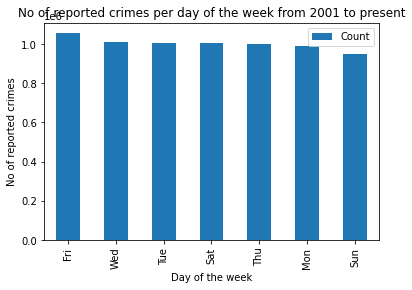

<Figure size 5760x720 with 0 Axes>

In [94]:
cp.sort_values('Count', ascending = False).plot(kind= 'bar', x='Day_of_week', y ='Count')
plt.xlabel('Day of the week')
plt.ylabel('No of reported crimes')
plt.title('No of reported crimes per day of the week from 2001 to present')
plt.figure(figsize=(80,10))

# Working with RDDs

In [4]:
ls

sample_data/  spark-2.3.1-bin-hadoop2.7/  spark-2.3.1-bin-hadoop2.7.tgz


## Downloading police station csv

In [7]:
!wget -O police-station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD 
!ls -l

--2020-04-01 16:34:35--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-station.csv’

police-station.csv      [ <=>                ]   5.57K  --.-KB/s    in 0s      

2020-04-01 16:34:37 (621 MB/s) - ‘police-station.csv’ saved [5699]

total 220612
-rw-r--r--  1 root root      5699 Aug 19  2019 police-station.csv
drwxr-xr-x  1 root root      4096 Mar 18 16:23 sample_data
drwxrwxr-x 13 1000 1000      4096 Jun  1  2018 spark-2.3.1-bin-hadoop2.7
-rw-r--r--  1 root root 225883783 Jun  1  2018 spark-2.3.1-bin-hadoop2.7.tgz


In [10]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [0]:
psrdd = sc.textFile('police-station.csv')

In [13]:
psrdd.first()

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [0]:
ps_header = psrdd.first()

In [16]:
ps_rest = psrdd.filter(lambda line: line!= ps_header)
ps_rest.first()

'1,Central,1718 S State St,Chicago,IL,60616,http://home.chicagopolice.org/community/districts/1st-district-central/,312-745-4290,312-745-3694,312-745-3693,1176569.052,1891771.704,41.85837259,-87.62735617,"(41.8583725929, -87.627356171)"'

**How many police stations are there?**

In [0]:
ps_rest.map(lambda line: line.split(',')).collect()

In [18]:
ps_rest.map(lambda line: line.split(',')).count()

24

**Display the District ID, District Name, Address and Zip for the police station with District ID 7**

In [20]:
(ps_rest.filter(lambda line: line.split(',')[0] == '7').
 map(lambda line: (line.split(',')[0],
                   line.split(',')[1],
                   line.split(',')[2],
                   line.split(',')[5],                                    
                  )).collect())

[('7', 'Englewood', '1438 W 63rd St', '60636')]

**Police stations 10 and 11 are geographically close to each other. Display the District ID, District Name, address and zip code**

In [23]:
(ps_rest.filter(lambda line: line.split(',')[0] in ['10', '11']).
  map(lambda line: (line.split(',')[1],
                    line.split(',')[2],
                    line.split(',')[5],
                    )).collect())

[('Harrison', '3151 W Harrison St', '60612'),
 ('Ogden', '3315 W Ogden Ave', '60623')]